# Part 1.

The deadline for Part 1 is **1:30 pm Feb 6, 2020**.   
You should submit a `.ipynb` file with your solutions to NYU Classes.

---


In this part we will preprocess SMS Spam Collection Dataset and train a bag-of-words classifier (logistic regression) for spam detection. 


# **Kent Cai**
**kcc407**
**N14639537**
**2/6/2020**





In [0]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [0]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  """Entry point for launching an IPython kernel.


In [0]:
import json
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [0]:
os.getcwd()

'/content'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/alldata.csv')
df = df.dropna()

In [0]:
conditions = [(df['direction'] == "up"), (df['direction'] == "down")]
choices = [1, -1]
df['dir'] = np.select(conditions, choices, default=0)

In [0]:
df['whole'] = df.whole.astype(str)

In [0]:
#df['tag'] = df.ticker + df.date
#df['tag'] = df.tag.astype(str)
#df['idx'] = df.index
#df = df.rename(columns={"whole": "text"})
#df = df.rename(columns={"ex_return": "ret"})

In [0]:
#df = df[['idx','tag','text','dir','ret']]

In [0]:
df.head()

,Unnamed: 0,corpus_index,date,direction,ex_return,ticker,whole,dir
0,62740,16,2001-01-25,down,-5.80473,LLY,on that managed short term symptoms are then b...,-1
1,62737,13,2001-01-25,down,-5.80473,LLY,is from Steve Tie's line from Merrill Lynch. P...,-1
2,62730,6,2001-01-25,down,-5.80473,LLY,"6%. Excluding the effect of exchange rates, an...",-1
3,62739,15,2001-01-25,down,-5.80473,LLY,year when we will be losing execution of the m...,-1
4,62729,5,2001-01-25,down,-5.80473,LLY,last year totalling $419 million. The decline ...,-1


In [0]:
df = df[(df['ex_return']>= df.ex_return.quantile(0.025)) & (df['ex_return']<= df.ex_return.quantile(0.975))]


Text(0, 0.5, 'Frequency')

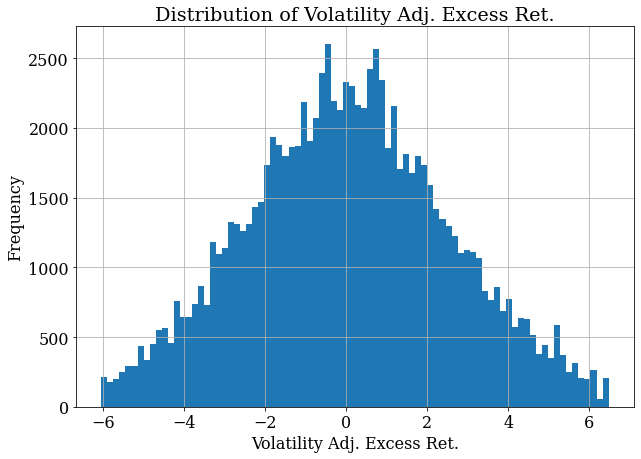

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 16})

df.ex_return.hist(bins='auto',figsize=(10,7))
plt.title('Distribution of Volatility Adj. Excess Ret.')
plt.xlabel('Volatility Adj. Excess Ret.')
plt.ylabel('Frequency')


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Volatility Adj. Excess Ret.')]

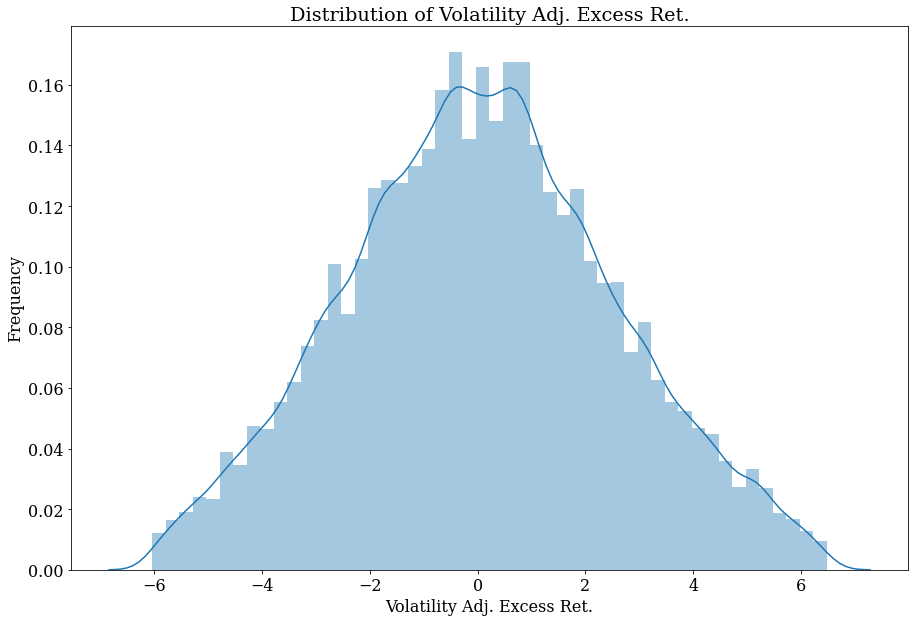

In [0]:
import seaborn as sns
plt.rcParams['figure.figsize'] = 15,10
ax = sns.distplot(df.ex_return)
ax.set_title('Distribution of Volatility Adj. Excess Ret.')
#ax.set_ylabel('Frequency')
ax.set(xlabel='Volatility Adj. Excess Ret.',ylabel='Frequency')


In [0]:
len(df[df.direction=='down'])/len(df)

0.4945882644269957

In [0]:
df.ex_return.std()

2.5021168466181227

In [0]:
pivot = df.pivot_table(index=['ticker','date'], aggfunc=np.sum)
pivot.head()

Unnamed: 0  corpus_index  dir  ex_return
ticker date                                                
A      2001-05-17         325           325  -26 -14.801375
       2001-08-20        1160           406   29  34.785864
       2002-05-16        1365           210  -21 -60.734350
       2002-08-19        1336           120  -16 -14.038662
       2002-11-18        1919           171   19  20.272388

In [0]:
pivot.dir.sum()

1049

Your task is to split the data to train/dev/test. Make sure that each row appears only in one of the splits.

In [0]:
# 0.15 for val, 0.15 for test, 0.7 for train
val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)
train_size = int(df.shape[0] * 0.7)

train_ticker, train_date, train_corp, train_texts, train_ret, train_dir = df.ticker[:train_size], df.date[:train_size], df.corpus_index[:train_size], df.whole[:train_size], df.ex_return[:train_size], df.dir[:train_size]
val_ticker, val_date, val_corp, val_texts, val_ret, val_dir = df.ticker[train_size:train_size+val_size], df.date[train_size:train_size+val_size], df.corpus_index[train_size:train_size+val_size], df.whole[train_size:train_size+val_size], df.ex_return[train_size:train_size+val_size], df.dir[train_size:train_size+val_size]
test_ticker, test_date, test_corp, test_texts, test_ret, test_dir = df.ticker[train_size+val_size:], df.date[train_size+val_size:], df.corpus_index[train_size+val_size:], df.whole[train_size+val_size:], df.ex_return[train_size+val_size:], df.dir[train_size+val_size:]

In [0]:
val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)
train_size = int(df.shape[0] * 0.7)

train = df[:train_size]
val = df[train_size:train_size+val_size]
test = df[train_size+val_size:]

In [0]:
len(test)

14539

In [0]:
pivot = test.pivot_table(index=['ticker','date'], aggfunc=np.sum)
len(pivot)

958

In [0]:
train.to_json('train.json',orient='index')

In [0]:
from google.colab import files
df.to_csv('bert_data.csv')
files.download('bert_data.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 44244, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
len(test_texts)/len(df) + len(val_texts)/len(df) + len(train_texts)/len(df)

1.0

In [0]:
len(df)

101996

## Data Processing

The task is to create bag-of-words features: tokenize the text, index each token, represent the sentence as a dictionary of tokens and their counts, limit the vocabulary to $n$ most frequent tokens. In the lab we use built-in `sklearn` function, `sklearn.feature_extraction.text.CountVectorizer`. 
**In this HW, you are required to implement the `Vectorizer` on your own without using `sklearn` built-in functions.**

Function `preprocess_data` takes the list of texts and returns list of (lists of tokens). 
You may use [spacy](https://spacy.io/) or [nltk](https://www.nltk.org/) text processing libraries in `preprocess_data` function. 

Class `Vectorizer` is used to vectorize the text and to create a matrix of features.


In [0]:
!pip install nltk

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def preprocess_data(data):

    import string
    import nltk
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    stop_words
    # This function should return a list of lists of preprocessed tokens for each message
    """
    YOUR CODE GOES HERE
    """
    
    result = []
    for sentence in tqdm(data):
        nopunc = [char for char in sentence if char not in string.punctuation]
        nopunc = ''.join(nopunc)
        
        clean_words = [word for word in nopunc.split() if word.lower() not in stop_words]
        
        result.append(clean_words)

    preprocessed_data = result
    return preprocessed_data

train_data = preprocess_data(train_texts)
val_data = preprocess_data(val_texts)
test_data = preprocess_data(test_texts)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [0]:
import numpy as np

class Vectorizer():
    def __init__(self, max_features):
        self.max_features = max_features
        self.vocab_list = None
        self.token_to_index = None

    def fit(self, dataset):
        # Create a vocab list, self.vocab_list, using the most frequent "max_features" tokens
        # Create a token indexer, self.token_to_index, that will return index of the token in self.vocab
        """
        YOUR CODE GOES HERE
        """
        vocab_list  = []
        for sentence in tqdm(dataset):
          for word in sentence:
            if word not in vocab_list:
              vocab_list.append(word)
        count_list = []
        dic = {}
        for vocab in vocab_list:
          dic.update({str(vocab):0})
        for sentence in tqdm(dataset):
          for word in sentence:
            dic[word] += 1

        from operator import itemgetter
        import operator
        d = dict(sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
        sorted_vocab_list = list(d.keys())
        count_list = list(d.values())

        #index_list = []
        #i = 0
        #for vocab in vocab_list:
          #index_list.append(i)
          #i+=1


        if self.max_features is not None:
          self.vocab_list = sorted_vocab_list[:self.max_features]

        idx = 0
        index_dic = {}
        for vocab in self.vocab_list: #sorted_vocab_list:
          index_dic.update({str(vocab):idx})
          idx+=1

        self.token_to_index = index_dic

        pass

    def transform(self, dataset):
        # This function transforms text dataset into a matrix, data_matrix
        """
        YOUR CODE GOES HERE
        """
        
        data_matrix = np.zeros((len(dataset), len(self.vocab_list)))
        i=0
        input_list = [0]*len(self.vocab_list)
        for sentence in tqdm(dataset):
          for word in sentence:
            if word in self.vocab_list:
              idx = self.token_to_index[word] #self.vocab_list.index(word)
              input_list[idx] += 1
          data_matrix[i] = input_list
          i+=1
          input_list = [0]*len(self.vocab_list)
        
        return data_matrix

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# max_features means how many words we will consider in vocab --> most frequent 200 words, not first 2000
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(train_contents)
X_train = vectorizer.transform(train_contents)
X_val = vectorizer.transform(val_contents)
X_test = vectorizer.transform(test_contents)

y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)
vocab = vectorizer.get_feature_names()

In [0]:
max_features = 500 # optimized based on best validation set results, optimizer at the end of the script
vectorizer = Vectorizer(max_features=max_features)
vectorizer.fit(train_data)
X_train = vectorizer.transform(train_data)
X_val = vectorizer.transform(val_data)
X_test = vectorizer.transform(test_data)

y_train = np.array(train_dir)
y_val = np.array(val_dir)
y_test = np.array(test_dir)

vocab = vectorizer.vocab_list


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


KeyboardInterrupt: ignored

In [0]:
X_train.shape

(5181, 500)

You can add more features to the feature matrix.

In [0]:
"""
YOUR CODE GOES HERE
"""

# NOTE: SINCE SOME SENTENCES MAY NOT HAVE ANY WORDS THAT ARE IN THE VOCAB LIST
# DUE TO THE VOCAB LIST BEING LIMITED IN SIZE BY MAX_FEATURES
# ONE POTENTIAL MODIFICATION IS TO ADD A COLUMN IN THE FEATURE MATRIX THAT COUNTS ALL INSTANCES OF VOCABS NOT IN THE TOP X MOST FREQUENT VOCAB LIST

'\nYOUR CODE GOES HERE\n'

## Model

We train logistic regression model and save prediction for train, val and test.


In [0]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
model = LogisticRegression(random_state=0, solver='liblinear')

# Fit the model to training data
model.fit(X_train, y_train)

# Make prediction using the trained model
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

array(['up', 'down', 'down', ..., 'up', 'down', 'down'], dtype=object)

In [0]:
def pred_combine(train_ticker, train_date, y_train, y_train_pred, val_ticker,val_date,y_val,y_val_pred,test_ticker,test_date,y_test,y_test_pred):

  train_result = pd.DataFrame({"Ticker":train_ticker,"Date":train_date,"actual":y_train,"pred":y_train_pred})
  val_result = pd.DataFrame({"Ticker":val_ticker,"Date":val_date,"actual":y_val,"pred":y_val_pred})
  test_result = pd.DataFrame({"Ticker":test_ticker,"Date":test_date,"actual":y_test,"pred":y_test_pred})


  train_pivot = train_result.pivot_table(index=['Ticker','Date'], aggfunc=np.sum)
  conditions_act = [(train_pivot['actual']>0), (train_pivot['actual']<0)]
  choices_act = [1, -1]
  train_pivot['act'] = np.select(conditions_act, choices_act, default=0)

  conditions_pr = [(train_pivot['pred']>0), (train_pivot['pred']<0)]
  choices_pr = [1, -1]
  train_pivot['pr'] = np.select(conditions_pr, choices_pr, default=0)

  y_train_comb = train_pivot.act.tolist()
  y_train_pred_comb = train_pivot.pr.tolist()

  #########

  val_pivot = val_result.pivot_table(index=['Ticker','Date'], aggfunc=np.sum)
  conditions_act = [(val_pivot['actual']>0), (val_pivot['actual']<0)]
  choices_act = [1, -1]
  val_pivot['act'] = np.select(conditions_act, choices_act, default=0)

  conditions_pr = [(val_pivot['pred']>0), (val_pivot['pred']<0)]
  choices_pr = [1, -1]
  val_pivot['pr'] = np.select(conditions_pr, choices_pr, default=0)

  y_val_comb = val_pivot.act.tolist()
  y_val_pred_comb = val_pivot.pr.tolist()

  #########

  test_pivot = test_result.pivot_table(index=['Ticker','Date'], aggfunc=np.sum)
  conditions_act = [(test_pivot['actual']>0), (test_pivot['actual']<0)]
  choices_act = [1, -1]
  test_pivot['act'] = np.select(conditions_act, choices_act, default=0)

  conditions_pr = [(test_pivot['pred']>0), (test_pivot['pred']<0)]
  choices_pr = [1, -1]
  test_pivot['pr'] = np.select(conditions_pr, choices_pr, default=0)

  y_test_comb = test_pivot.act.tolist()
  y_test_pred_comb = test_pivot.pr.tolist()

  return y_train_comb, y_train_pred_comb, y_val_comb, y_val_pred_comb, y_test_comb, y_test_pred_comb

## Performance of the model

Your task is to report train, val, test accuracies and F1 scores.
**You are required to implement `accuracy_score` and `f1_score` methods without using built-in python functions.**

Your model should achieve at least **0.95** test accuracy and **0.90** test F1 score.

In [0]:
def accuracy_score(y_true, y_pred): 
    # Calculate accuracy of the model's prediction
    """
    YOUR CODE GOES HERE
    """
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(0,len(y_true)):
      if(y_true[i]==1 and y_pred[i]==1):
        tp+=1
      elif(y_true[i]==-1 and y_pred[i]==1):
        fp+=1
      elif(y_true[i]==-1 and y_pred[i]==-1):
        tn+=1
      elif(y_true[i]==1 and y_pred[i]==-1):
        fn+=1

    accuracy = float((tp+tn) / (tp+tn+fp+fn))
    return accuracy

def f1_score(y_true, y_pred): 
    # Calculate F1 score of the model's prediction
    """
    YOUR CODE GOES HERE
    """

    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(0,len(y_true)):
      if(y_true[i]==1 and y_pred[i]==1):
        tp+=1
      elif(y_true[i]==-1 and y_pred[i]==1):
        fp+=1
      elif(y_true[i]==-1 and y_pred[i]==-1):
        tn+=1
      elif(y_true[i]==1 and y_pred[i]==-1):
        fn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision*recall) / (precision+recall)
    return f1

In [0]:
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred):.3f}, "
      f"F1 score: {f1_score(y_train, y_train_pred):.3f}")
print(f"Validation accuracy: {accuracy_score(y_val, y_val_pred):.3f}, "
      f"F1 score: {f1_score(y_val, y_val_pred):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, y_test_pred):.3f}, "
      f"F1 score: {f1_score(y_test, y_test_pred):.3f}")

Training accuracy: 0.625, F1 score: 0.657
Validation accuracy: 0.512, F1 score: 0.480
Test accuracy: 0.526, F1 score: 0.518


In [0]:
def optimizer(param_list):
  train_acc_list = []
  train_f1_list = []
  val_acc_list = []
  val_f1_list = []
  test_acc_list = []
  test_f1_list = []
  for param in tqdm(param_list):
    print("testing param: "+str(param))
    print("===========")
    print("===========")


    from sklearn.feature_extraction.text import CountVectorizer

    # max_features means how many words we will consider in vocab --> most frequent 200 words, not first 2000
    max_features = param
    vectorizer = CountVectorizer(max_features=max_features)
    vectorizer.fit(train_texts)
    X_train = vectorizer.transform(train_texts)
    X_val = vectorizer.transform(val_texts)
    X_test = vectorizer.transform(test_texts)

    y_train = np.array(train_dir)
    y_val = np.array(val_dir)
    y_test = np.array(test_dir)
    vocab = vectorizer.get_feature_names()  

    #max_features = param
    #vectorizer = Vectorizer(max_features=max_features)
    #vectorizer.fit(train_data)
    #X_train = vectorizer.transform(train_data)
    #X_val = vectorizer.transform(val_data)


    #y_train = np.array(train_dir)
    #y_val = np.array(val_dir)


    #vocab = vectorizer.vocab_list

    #from sklearn.linear_model import LogisticRegression
    # Define Logistic Regression model
    model = LogisticRegression(random_state=0, solver='liblinear')

    # Fit the model to training data
    model.fit(X_train, y_train)

    # Make prediction using the trained model
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    #y_train_comb, y_train_pred_comb, y_val_comb, y_val_pred_comb, y_test_comb, y_test_pred_comb = pred_combine(train_ticker, train_date, y_train, y_train_pred, val_ticker,val_date,y_val,y_val_pred,test_ticker,test_date,y_test,y_test_pred)

    #train_acc = accuracy_score(y_train_comb, y_train_pred_comb)
    #val_acc = accuracy_score(y_val_comb, y_val_pred_comb)
    #test_acc = accuracy_score(y_test_comb, y_test_pred_comb)
    #train_f1 = f1_score(y_train_comb, y_train_pred_comb)
    #val_f1 = f1_score(y_val_comb, y_val_pred_comb)
    #test_f1 = f1_score(y_test_comb, y_test_pred_comb)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    train_acc_list.append(train_acc)
    train_f1_list.append(train_f1)
    val_acc_list.append(val_acc)
    val_f1_list.append(val_f1)
    test_acc_list.append(test_acc)
    test_f1_list.append(test_f1)

  return train_acc_list, train_f1_list, val_acc_list, val_f1_list, test_acc_list, test_f1_list, y_test_pred, y_train_pred, y_val_pred

  

In [0]:
#max_feat_list = np.array([1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000])
max_feat_list = np.array([2800])
train_acc_list, train_f1_list, val_acc_list, val_f1_list, test_acc_list, test_f1_list, y_test_pred, y_train_pred, y_val_pred = optimizer(max_feat_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


testing param: 2800



In [0]:
len(test), len(y_test_pred)

(14539, 14539)

In [0]:
test['predicted'] = y_test_pred
train['predicted'] = y_train_pred
val['predicted'] = y_val_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
test.head(1)

,Unnamed: 0,corpus_index,date,direction,ex_return,ticker,whole,dir,predicted
88159,77033,2,2005-04-28,down,-0.118821,NWL,we have walked away from additional volume tha...,-1,1


In [0]:
train.head(1)

,Unnamed: 0,corpus_index,date,direction,ex_return,ticker,whole,dir,predicted
0,62740,16,2001-01-25,down,-5.80473,LLY,on that managed short term symptoms are then b...,-1,-1


In [0]:
prev_ticker = 'NWL'
prev_date = '2005-04-28'
pred_list = []
pos = 0
neg = 0
result = []
for index, row in test.iterrows():
  if row.ticker == prev_ticker and row.date==prev_date:
    pred_list.append(row.predicted)
    prev_ticker = row.ticker
    prev_date = row.date
  else:
    #print('no')
    #pred_list.append(row.predicted)
    for i in pred_list:
      if i > 0:
        pos +=1
      if i < 0:
        neg +=1
    perc_pos = pos/(pos+neg)
    perc_neg = neg/(pos+neg)
    agree = max(perc_pos, perc_neg)
    #if len(pred_list) == 1:
    pred_list = []
    pred_list.append(row.predicted)
    result.append(agree)
    prev_ticker = row.ticker
    prev_date = row.date

sum(result)/len(result)

0.5681353004670934

In [0]:
prev_ticker = 'LLY'
prev_date = '2001-01-25'
pred_list = []
pos = 0
neg = 0
result = []
for index, row in train.iterrows():
  if row.ticker == prev_ticker and row.date==prev_date:
    pred_list.append(row.predicted)
    prev_ticker = row.ticker
    prev_date = row.date
  else:
    #print('no')
    #pred_list.append(row.predicted)
    for i in pred_list:
      if i > 0:
        pos +=1
      if i < 0:
        neg +=1
    perc_pos = pos/(pos+neg)
    perc_neg = neg/(pos+neg)
    agree = max(perc_pos, perc_neg)
    #if len(pred_list) == 1:
    pred_list = []
    pred_list.append(row.predicted)
    result.append(agree)
    prev_ticker = row.ticker
    prev_date = row.date

sum(result)/len(result)

0.5911315641186514

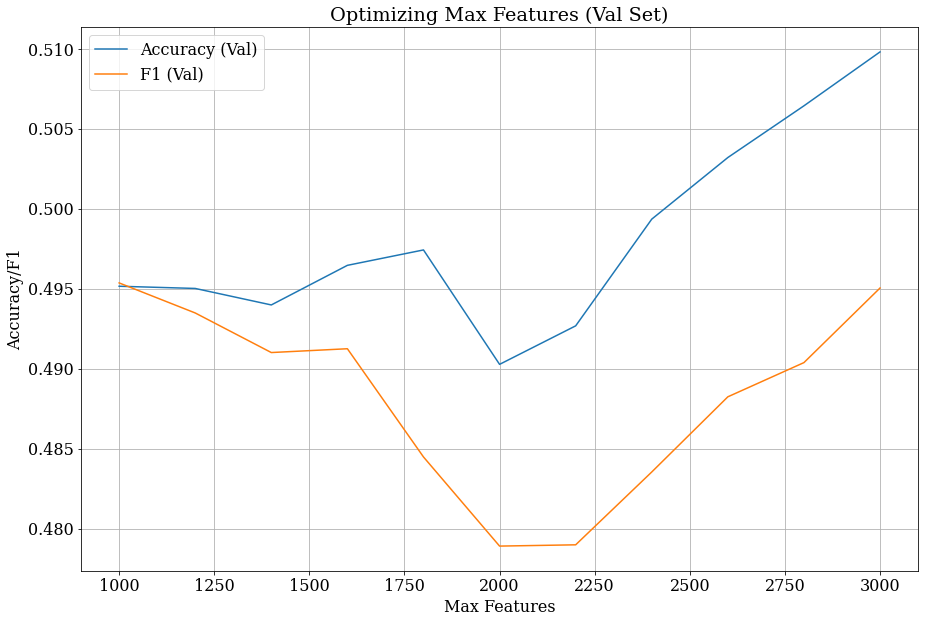

In [0]:
import matplotlib.pyplot as plt

plt.plot(max_feat_list, val_acc_list, label="Accuracy (Val)")
plt.plot(max_feat_list, val_f1_list, label="F1 (Val)")
plt.title("Optimizing Max Features (Val Set)")
plt.xlabel("Max Features")
plt.ylabel("Accuracy/F1")
plt.legend()
plt.grid()
plt.show()

In [0]:
test = pd.DataFrame({"Max Features":max_feat_list.tolist(),"Test Acc.":test_acc_list,"Test F1":test_f1_list})

In [0]:
test

,Max Features,Test Acc.,Test F1
0,1000,0.516198,0.556159
1,1200,0.514066,0.547435
2,1400,0.516817,0.551834
3,1600,0.521975,0.553743
4,1800,0.520118,0.549668
5,2000,0.524451,0.555941
6,2200,0.525071,0.554142
7,2400,0.521769,0.549530
8,2600,0.523420,0.542368
9,2800,0.521700,0.544776


In [0]:
val = pd.DataFrame({"Max Features":max_feat_list.tolist(),"Val Acc.":val_acc_list,"Val F1":val_f1_list})
val

,Max Features,Val Acc.,Val F1
0,1000,0.495150,0.495359
1,1200,0.495013,0.493480
2,1400,0.493981,0.491005
3,1600,0.496457,0.491243
4,1800,0.497420,0.484476
5,2000,0.490266,0.478903
6,2200,0.492674,0.478983
7,2400,0.499346,0.483537
8,2600,0.503199,0.488237
9,2800,0.506432,0.490376


In [0]:
final = pd.DataFrame({"Test":[test_acc_list[9],test_f1_list[9]],"Val":[val_acc_list[9],val_f1_list[9]],"Train":[train_acc_list[9],train_f1_list[9]]},index=["Accuracy","F1"])
final

,Test,Val,Train
Accuracy,0.521700,0.506432,0.641304
F1,0.544776,0.490376,0.677481


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# max_features means how many words we will consider in vocab --> most frequent 200 words, not first 2000
max_features = 2000
vectorizer = CountVectorizer(max_features=max_features)
vectorizer.fit(train_texts)
X_train = vectorizer.transform(train_texts)
X_val = vectorizer.transform(val_texts)
X_test = vectorizer.transform(test_texts)

y_train = np.array(train_ret)
y_val = np.array(val_ret)
y_test = np.array(test_ret)
vocab = vectorizer.get_feature_names()  

In [0]:
val_dir

72629   -1
72630    1
72631    1
72632    1
72633   -1
        ..
88085   -1
88086   -1
88087   -1
88088   -1
88089   -1
Name: dir, Length: 15299, dtype: int64

In [0]:
#from sklearn import linear_model
#https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
from sklearn.linear_model import Lasso
#from sklearn.metrics import r2_score

for i in tqdm([0.001,0.01,0.1,1,10]):
  lasso = Lasso(alpha=i)
  model = lasso.fit(X_train,y_train)
  train_score=lasso.score(X_train,y_train)
  test_score=lasso.score(X_test,y_test)
  coeff_used = np.sum(lasso.coef_!=0)
  print("alpha= "+str(i))
  print(train_score, test_score, coeff_used)
  print("==========")

# Make prediction using the trained model
#y_train_pred = model.predict(X_train)
#y_val_pred = model.predict(X_val)
#y_test_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


alpha= 0.001
0.08594260738720694 -0.06953624688807691 1958
alpha= 0.01
0.035459355233090406 -0.04838195805634071 330
alpha= 0.1
0.00327073279331469 -0.05295128236972068 7
alpha= 1
0.0 -0.059778799183771714 0
alpha= 10
0.0 -0.059778799183771714 0



In [0]:
train_score, test_score, coeff_used

(0.035459355233090406, -0.04838195805634071, 330)

In [0]:
from sklearn.linear_model import LassoCV
reg = LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
                                0.3, 0.6, 1]).fit(X_train, y_train)
train_score=reg.score(X_train,y_train)
test_score=reg.score(X_test,y_test)
coeff_used = np.sum(reg.coef_!=0)

KeyboardInterrupt: ignored

In [0]:
train_score, test_score, coeff_used

(0.035459355233090406, -0.04838195805634071, 330)

In [0]:
y_train_pred = reg.predict(X_train)
y_val_pred = reg.predict(X_val)
y_test_pred = reg.predict(X_test)

NameError: ignored

In [0]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
model = lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [0]:
coeff_used

641

In [0]:
def lasso_combine(train_ticker, train_date, y_train, y_train_pred, val_ticker,val_date,y_val,y_val_pred,test_ticker,test_date,y_test,y_test_pred):

  train_result = pd.DataFrame({"Ticker":train_ticker,"Date":train_date,"actual":y_train,"pred":y_train_pred})
  val_result = pd.DataFrame({"Ticker":val_ticker,"Date":val_date,"actual":y_val,"pred":y_val_pred})
  test_result = pd.DataFrame({"Ticker":test_ticker,"Date":test_date,"actual":y_test,"pred":y_test_pred})


  train_pivot = train_result.pivot_table(index=['Ticker','Date'], aggfunc=np.mean)
  #conditions_act = [(train_pivot['actual']>0), (train_pivot['actual']<0)]
  #choices_act = [1, -1]
  #train_pivot['act'] = np.select(conditions_act, choices_act, default=0)

  #conditions_pr = [(train_pivot['pred']>0), (train_pivot['pred']<0)]
  #choices_pr = [1, -1]
  #train_pivot['pr'] = np.select(conditions_pr, choices_pr, default=0)

  y_train_comb = train_pivot.actual.tolist()
  y_train_pred_comb = train_pivot.pred.tolist()

  #########

  val_pivot = val_result.pivot_table(index=['Ticker','Date'], aggfunc=np.mean)
  #conditions_act = [(val_pivot['actual']>0), (val_pivot['actual']<0)]
  #choices_act = [1, -1]
  #val_pivot['act'] = np.select(conditions_act, choices_act, default=0)

  #conditions_pr = [(val_pivot['pred']>0), (val_pivot['pred']<0)]
  #choices_pr = [1, -1]
  #val_pivot['pr'] = np.select(conditions_pr, choices_pr, default=0)

  y_val_comb = val_pivot.actual.tolist()
  y_val_pred_comb = val_pivot.pred.tolist()

  #########

  test_pivot = test_result.pivot_table(index=['Ticker','Date'], aggfunc=np.mean)
  #conditions_act = [(test_pivot['actual']>0), (test_pivot['actual']<0)]
  #choices_act = [1, -1]
  #test_pivot['act'] = np.select(conditions_act, choices_act, default=0)

  #conditions_pr = [(test_pivot['pred']>0), (test_pivot['pred']<0)]
  #choices_pr = [1, -1]
  #test_pivot['pr'] = np.select(conditions_pr, choices_pr, default=0)

  y_test_comb = test_pivot.actual.tolist()
  y_test_pred_comb = test_pivot.pred.tolist()

  return y_train_comb, y_train_pred_comb, y_val_comb, y_val_pred_comb, y_test_comb, y_test_pred_comb

In [0]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

#y_train_comb, y_train_pred_comb, y_val_comb, y_val_pred_comb, y_test_comb, y_test_pred_comb = lasso_combine(train_ticker, train_date, y_train, y_train_pred, val_ticker,val_date,y_val,y_val_pred,test_ticker,test_date,y_test,y_test_pred)

In [0]:
test_score

-0.03954895471358699

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

-0.04068968134465534

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

6.387766589294009

In [0]:
sum(y_val_comb) / len(y_val_comb)

-0.4989023385274266

In [0]:
sum(y_val_pred_comb) / len(y_val_pred_comb)

0.2347414425376842

In [0]:
len(y_test_pred_comb)

958

In [0]:
len(y_test_pred)

15300

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

11.707112316344576

In [0]:
somedf = pd.DataFrame({"actual":y_test_comb,"pred":y_test_pred_comb})
somedf['prod'] = somedf.actual*somedf.pred
right = somedf[somedf['prod']>0]
len(right)/len(somedf)

0.5386221294363257

In [0]:
def accuracy_score(y_true, y_pred): 
    # Calculate accuracy of the model's prediction
    """
    YOUR CODE GOES HERE
    """
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(0,len(y_true)):
      if(y_true[i]>=0 and y_pred[i]>=0):
        tp+=1
      elif(y_true[i]<0 and y_pred[i]>=0):
        fp+=1
      elif(y_true[i]<0 and y_pred[i]<0):
        tn+=1
      elif(y_true[i]>=0 and y_pred[i]<0):
        fn+=1

    accuracy = float((tp+tn) / (tp+tn+fp+fn))
    return accuracy

def f1_score(y_true, y_pred): 
    # Calculate F1 score of the model's prediction
    """
    YOUR CODE GOES HERE
    """

    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(0,len(y_true)):
      if(y_true[i]>=0 and y_pred[i]>=0):
        tp+=1
      elif(y_true[i]<0 and y_pred[i]>=0):
        fp+=1
      elif(y_true[i]<0 and y_pred[i]<0):
        tn+=1
      elif(y_true[i]>=0 and y_pred[i]<0):
        fn+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = (2*precision*recall) / (precision+recall)
    return f1

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def lasso_optimizer(param_list, alpha_list):
  train_r2_list = []
  val_r2_list = []
  test_r2_list = []
  train_mse_list = []
  val_mse_list = []
  test_mse_list = []
  #val_model_score = []
  #mse_list = []
  pair_list = []
  feat_out = []
  alpha_out = []
  coef_list = []

  #for i in tqdm(range(len(param_list))):
  for max_feat in tqdm(param_list):  
    # max_features means how many words we will consider in vocab --> most frequent 200 words, not first 2000
    # max_features = max_feat#param_list[i]
    vectorizer = CountVectorizer(max_features=max_feat)
    vectorizer.fit(train_texts)
    X_train = vectorizer.transform(train_texts)
    X_val = vectorizer.transform(val_texts)
    X_test = vectorizer.transform(test_texts)

    y_train = np.array(train_ret)
    y_val = np.array(val_ret)
    y_test = np.array(test_ret)
    vocab = vectorizer.get_feature_names()  


    for alpha in tqdm(alpha_list): 
      #lasso = Lasso(alpha=alpha_list[i])
      lasso = Lasso(alpha=alpha)
      model = lasso.fit(X_train,y_train)
      #train_score=lasso.score(X_train,y_train)
      #val_score=lasso.score(X_val,y_val)
      #val_model_score.append(val_score)
      coef_used = np.sum(lasso.coef_!=0)
      coef_list.append(coef_used)

      y_train_pred = model.predict(X_train)
      y_val_pred = model.predict(X_val)
      y_test_pred = model.predict(X_test)
      
      #mse = mean_squared_error(y_val, y_val_pred)
      #mse_list.append(mse)

      #y_train_comb, y_train_pred_comb, y_val_comb, y_val_pred_comb, y_test_comb, y_test_pred_comb = lasso_combine(train_ticker, train_date, y_train, y_train_pred, val_ticker,val_date,y_val,y_val_pred,test_ticker,test_date,y_test,y_test_pred)

      #train_df = pd.DataFrame({"actual":y_train_comb,"pred":y_train_pred_comb})
      #train_df['prod'] = train_df.actual*train_df.pred
      #train_right = train_df[train_df['prod']>0]
      #train_acc = len(train_right)/len(train_df)
      #train_acc_list.append(train_acc)

      #val_df = pd.DataFrame({"actual":y_val_comb,"pred":y_val_pred_comb})
      #val_df['prod'] = val_df.actual*val_df.pred
      #val_right = val_df[val_df['prod']>0]
      #val_acc = len(val_right)/len(val_df)
      #val_acc_list.append(val_acc)

      #test_df = pd.DataFrame({"actual":y_test_comb,"pred":y_test_pred_comb})
      #test_df['prod'] = test_df.actual*test_df.pred
      #test_right = test_df[test_df['prod']>0]
      #test_acc = len(test_right)/len(test_df)
      #test_acc_list.append(test_acc)

      #train_acc = accuracy_score(y_train_comb, y_train_pred_comb)
      #val_acc = accuracy_score(y_val_comb, y_val_pred_comb)
      #test_acc = accuracy_score(y_test_comb, y_test_pred_comb)
      #train_f1 = f1_score(y_train_comb, y_train_pred_comb)
      #val_f1 = f1_score(y_val_comb, y_val_pred_comb)
      #test_f1 = f1_score(y_test_comb, y_test_pred_comb)

      #train_acc_list.append(train_acc)
      #train_f1_list.append(train_f1)
      #val_acc_list.append(val_acc)
      #val_f1_list.append(val_f1)
      #test_acc_list.append(test_acc)
      #test_f1_list.append(test_f1)

      #train_r2 = r2_score(y_train_comb,y_train_pred_comb)
      #val_r2 = r2_score(y_val_comb,y_val_pred_comb)
      #test_r2 = r2_score(y_test_comb,y_test_pred_comb)
      #train_mse = mean_squared_error(y_train_comb, y_train_pred_comb)
      #val_mse = mean_squared_error(y_val_comb, y_val_pred_comb)
      #test_mse = mean_squared_error(y_test_comb, y_test_pred_comb)

      train_r2 = r2_score(y_train,y_train_pred)
      val_r2 = r2_score(y_val,y_val_pred)
      test_r2 = r2_score(y_test,y_test_pred)
      train_mse = mean_squared_error(y_train, y_train_pred)
      val_mse = mean_squared_error(y_val, y_val_pred)
      test_mse = mean_squared_error(y_test, y_test_pred)
      
      train_r2_list.append(train_r2)
      val_r2_list.append(val_r2)
      test_r2_list.append(test_r2)
      train_mse_list.append(train_mse)
      val_mse_list.append(val_mse)
      test_mse_list.append(test_mse)


      pair = str(max_feat)+'/'+str(alpha)
      pair_list.append(pair)

      feat_out.append(max_feat)
      alpha_out.append(alpha)


  return pair_list, feat_out, alpha_out, coef_list, train_r2_list, val_r2_list, test_r2_list, train_mse_list,val_mse_list,test_mse_list



In [0]:
param_list = [2000,2500,3000]
alpha_list = [0.001,0.0005,0.0001,0.00001]
pair_list, feat_out, alpha_out, coef_list, train_r2_list, val_r2_list, test_r2_list, train_mse_list,val_mse_list,test_mse_list = lasso_optimizer(param_list, alpha_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
lasso_result = pd.DataFrame({"Pair":pair_list,"Max_Feat":feat_out,"Alpha":alpha_out,"Params":coef_list, "Train_R2":train_r2_list,"Val_R2":val_r2_list,"Test_R2":test_r2_list,"Train_MSE":train_mse_list,"Val_MSE":val_mse_list,"Test_MSE":test_mse_list})

In [0]:
len(coef_out)

36

In [0]:
from google.colab import files
import os
os.chdir('/content/drive/My Drive/results')
lasso_result.to_csv('lasso_result.csv',encoding="utf-8-sig")

In [0]:
pd.options.display.float_format = '{:.5f}'.format
lasso_result[5:]

,Pair,Max_Feat,Alpha,R^2,MSE,Train_Acc,Val_Acc,Test_Acc
5,1000/1e-05,1000,0.00001,-0.08415,1.03949,0.62426,0.49156,0.52296
6,1500/0.005,1500,0.00500,-0.06288,1.01910,0.55838,0.45148,0.49061
7,1500/0.001,1500,0.00100,-0.07952,1.03506,0.61831,0.48945,0.54175
8,1500/0.0005,1500,0.00050,-0.08944,1.04456,0.63377,0.48207,0.54280
9,1500/0.0001,1500,0.00010,-0.10224,1.05684,0.64447,0.48207,0.54906
10,1500/5e-05,1500,0.00005,-0.10428,1.05879,0.64447,0.48312,0.54697
11,1500/1e-05,1500,0.00001,-0.10599,1.06044,0.64471,0.47890,0.54593
12,2000/0.005,2000,0.00500,-0.06557,1.02168,0.55862,0.45886,0.49687
13,2000/0.001,2000,0.00100,-0.08500,1.04031,0.63781,0.50422,0.55428
14,2000/0.0005,2000,0.00050,-0.09910,1.05383,0.65636,0.50000,0.55950


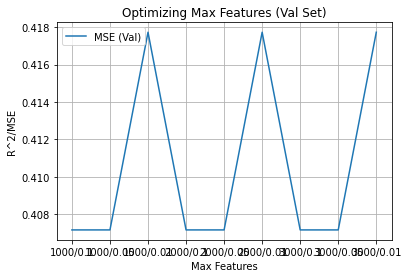

In [0]:
import matplotlib.pyplot as plt
plt.plot(pair_list, val_acc_list, label="MSE (Val)")
plt.title("Optimizing Max Features (Val Set)")
plt.xlabel("Max Features")
plt.ylabel("R^2/MSE")
plt.legend()
plt.grid()
plt.show()

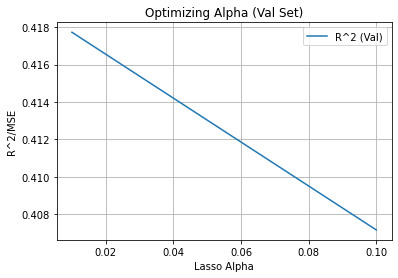

In [0]:
import matplotlib.pyplot as plt
plt.plot(alpha_list, val_acc_list, label="R^2 (Val)")
plt.title("Optimizing Alpha (Val Set)")
plt.xlabel("Lasso Alpha")
plt.ylabel("R^2/MSE")
plt.legend()
plt.grid()
plt.show()

In [0]:
mse_list

[1.0314083938455831,
 1.0315862835784768,
 1.0242845386653416,
 1.0314083938455831,
 1.0315862835784768,
 1.0247248518648502,
 1.0314083938455831,
 1.0315862835784768,
 1.0247250656381313]

In [0]:
val_model_score

[-0.07571775160635363,
 -0.07590328349134112,
 -0.06828785524038916,
 -0.07571775160635363,
 -0.07590328349134112,
 -0.06874708431764343,
 -0.07571775160635363,
 -0.07590328349134112,
 -0.06874730727463563]

In [0]:
val_acc_list

[0.40717299578059074,
 0.40717299578059074,
 0.4177215189873418,
 0.40717299578059074,
 0.40717299578059074,
 0.4177215189873418,
 0.40717299578059074,
 0.40717299578059074,
 0.4177215189873418]

In [0]:
test_acc_list

[0.46242171189979125,
 0.46242171189979125,
 0.46659707724425886,
 0.4968684759916493,
 0.5448851774530271,
 0.5605427974947808,
 0.5542797494780793]

In [0]:
df[df['ex_return'] ]

SyntaxError: ignored

In [0]:
df[df.ex_return.isnull()]

,Unnamed: 0,corpus_index,date,direction,ex_return,ticker,whole,dir
1177,89168,18,2001-04-24,down,NaN,ROH,million cubic feet of gas. And that's the raw ...,-1
1226,89170,20,2001-04-24,down,NaN,ROH,"certified customers for this, there is a signi...",-1
1227,89160,10,2001-04-24,down,NaN,ROH,when you look at the end devices decline in vo...,-1
1262,89156,6,2001-04-24,down,NaN,ROH,rules for accounting for derivative instrument...,-1
1263,89155,5,2001-04-24,down,NaN,ROH,"control across the board, and successful intro...",-1
...,...,...,...,...,...,...,...,...
103369,20605,6,2005-12-19,down,NaN,CEG,forces with more diverse channels of growth th...,-1
103370,20606,7,2005-12-19,down,NaN,CEG,able to add to all this essentially organic gr...,-1
103371,20607,8,2005-12-19,down,NaN,CEG,1 billion in 2008 due to higher power prices. ...,-1
103372,20608,9,2005-12-19,down,NaN,CEG,"two well-run nuclear programs, increased scale...",-1


**Note: the results may be different, where the F1 score may fall below 0.9 depending on the shuffling of the original data and the training set.**

**Question.**
Is accuracy the metric that logistic regression optimizes while training? If no, which metric is optimized in logistic regression?

**Your answer:** Accuracy is **NOT** the metric that logistic regression optimizes while training. Instead, logistic regression uses the log likelihood function to optimize results.

**Question.**
In general, does having 0.99 accuracy on test means that the model is great? If no, can you give an example of a case when the accuracy is high but the model is not good? (Hint: why do we use F1 score?)

**Your answer:** For spam detection, FP is the worst because it means lableing an useful email as spam and never getting to it. Hence a good model needs to minimize FP. Having 0.99 accuracy on test does not mean the model is great because if the data only has 1% spam, the accuracy score will be dominated by TN part in the numerator, which is less important than the TP. This is why it's important to also look at the F1 score which is some form of geometric average between precision and recall, which is a more suitable metric for spam detection.

### Exploration of predicitons

Show a few examples with true+predicted labels on the train and val sets.

In [0]:
"""
YOUR CODE GOES HERE
"""
# 1 - spam, 0 - ham

count=0
i=0

print("First 5 TP examples from train set: ")
print(" ")

while (i<len(y_train) and count<5):
  if(y_train[i]==1 and y_train_pred[i]==1):
    print(train_data[i])
    count+=1
  i+=1

count=0
i=0

print(" ")
print(" ")
print("First 5 TN examples from train set: ")
print(" ")

while (i<len(y_train) and count<5):
  if(y_train[i]==0 and y_train_pred[i]==0):
    print(train_data[i])
    count+=1
  i+=1

count=0
i=0
print(" ")
print(" ")
print("First 5 TP examples from val set: ")
print(" ")

while (i<len(y_val) and count<5):
  if(y_val[i]==1 and y_val_pred[i]==1):
    print(val_data[i])
    count+=1
  i+=1

count=0
i=0
print(" ")
print(" ")
print("First 5 TN examples from val set: ")
print(" ")

while (i<len(y_val) and count<5):
  if(y_val[i]==0 and y_val_pred[i]==0):
    print(val_data[i])
    count+=1
  i+=1


First 5 TP examples from train set: 
 
['PRIVATE', '2003', 'Account', 'Statement', '07753741225', 'shows', '800', 'unredeemed', 'points', 'Call', '08715203677', 'Identifier', 'Code', '42478', 'Expires', '241004']
['FREE', '1st', 'week', 'No1', 'Nokia', 'tone', '4', 'ur', 'mob', 'every', 'week', 'txt', 'NOKIA', '8007', 'Get', 'txting', 'tell', 'ur', 'mates', 'wwwgetzedcouk', 'POBox', '36504', 'W45WQ', 'norm150ptone', '16']
['URGENT', 'Important', 'information', '02', 'user', 'Today', 'lucky', 'day', '2', 'find', 'log', 'onto', 'httpwwwurawinnercom', 'fantastic', 'surprise', 'awaiting']
['PRIVATE', '2004', 'Account', 'Statement', '07742676969', 'shows', '786', 'unredeemed', 'Bonus', 'Points', 'claim', 'call', '08719180248', 'Identifier', 'Code', '45239', 'Expires']
['FreeMsg', 'Hey', 'U', 'got', '1', 'videopic', 'fones', 'reply', 'WILD', 'txt', 'ill', 'send', 'U', 'pics', 'hurry', 'Im', 'bored', 'work', 'xxx', '18', '150prcvd', 'STOP2stop']
 
 
First 5 TN examples from train set: 
 
['Ok

**Question** Print 10 examples from val set which were labeled incorrectly by the model. Why do you think the model got them wrong?

**Your answer:** Quite a few of the sentences incorrectly labeled had many numbers in them. Given the way I tokenized each word, these chains of numbers were treated as vocabs, and since it is highly unlikely for chains of numbers to repeatedly occur, they are likely not part of the top 2500 vocabs fed to the model based on max_features limit set to 2500

It's also interesting how many had to do with ringtones/calling etc.

In [0]:
"""
YOUR CODE GOES HERE
"""

print("First 10 examples of incorrect model predictions from val set: ")
print(" ")
count=0
i=0
while (i<len(y_val) and count<10):
  if(y_val[i]==0 and y_val_pred[i]==1):
    print("False Positive")
    print(val_data[i])
    count+=1
  if(y_val[i]==1 and y_val_pred[i]==0):
    print("False Negative")
    print(val_data[i])
    count+=1
  i+=1

First 10 examples of incorrect model predictions from val set: 
 
False Negative
['FreeMsg', 'Hey', 'darling', '3', 'weeks', 'word', 'back', 'Id', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'å£150', 'rcv']
False Negative
['Adult', '18', 'Content', 'video', 'shortly']
False Negative
['Enjoy', 'jamster', 'videosound', 'gold', 'club', 'credits', '2', 'new', 'videosounds2', 'logosmusicnews', 'get', 'fun', 'jamstercouk', '16only', 'Help', 'call', '09701213186']
False Negative
['Download', 'many', 'ringtones', 'u', 'like', 'restrictions', '1000s', '2', 'choose', 'U', 'even', 'send', '2', 'yr', 'buddys', 'Txt', 'Sir', '80082', 'å£3']
False Negative
['Collect', 'VALENTINES', 'weekend', 'PARIS', 'inc', 'Flight', 'Hotel', 'å£200', 'Prize', 'guaranteed', 'Text', 'PARIS', '69101', 'wwwrtfsphostingcom']
False Negative
['å£400', 'XMAS', 'REWARD', 'WAITING', 'computer', 'randomly', 'picked', 'loyal', 'mobile', 'customers', 'receive', 'å£400', 'reward', 'call', '09066380611']
Fa

Optimizing Hyperparameter (max_features)

In [0]:

def optimizer(param_list):
  train_acc_list = []
  train_f1_list = []
  val_acc_list = []
  val_f1_list = []
  for param in param_list:
    max_features = param
    vectorizer = Vectorizer(max_features=max_features)
    vectorizer.fit(train_data)
    X_train = vectorizer.transform(train_data)
    X_val = vectorizer.transform(val_data)


    y_train = np.array(train_labels)
    y_val = np.array(val_labels)


    vocab = vectorizer.vocab_list

    #from sklearn.linear_model import LogisticRegression
    # Define Logistic Regression model
    model = LogisticRegression(random_state=0, solver='liblinear')

    # Fit the model to training data
    model.fit(X_train, y_train)

    # Make prediction using the trained model
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    val_f1 = f1_score(y_val, y_val_pred)

    train_acc_list.append(train_acc)
    train_f1_list.append(train_f1)
    val_acc_list.append(val_acc)
    val_f1_list.append(val_f1)

  import matplotlib.pyplot as plt

  plt.plot(param_list, val_acc_list, label="Accuracy (Val)")
  plt.plot(param_list, val_f1_list, label="F1 (Val)")
  plt.title("Optimizing Max Features")
  plt.xlabel("Max Features")
  plt.ylabel("Accuracy/F1")
  plt.legend()
  plt.grid()
  plt.show()


In [0]:
max_feat_list = [200,400,600,800,1000]
optimizer(max_feat_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


KeyboardInterrupt: ignored

## End of Part 1.


Notes/Tests/Debug


In [0]:
vocab_list = []
for sentence in train_data:
  for word in sentence:
    if word not in vocab_list:
      vocab_list.append(word)

In [0]:
idx = 0
index_dic = {}
for vocab in sorted_vocab_list:
  index_dic.update({str(vocab):idx})
  idx+=1

In [0]:
word = "used"
index_dic[word]

688

In [0]:
index_list = []
for sentence in train_data:
  d = {}
  for vocab in vocab_list:
    d.update({str(vocab):0})
  for word in sentence:
    d[word]+=1
  index_list.append(d)

In [0]:
dic = {}
for vocab in vocab_list:
  dic.update({str(vocab):0})
for sentence in train_data:
  for word in sentence:
    dic[word] += 1

In [0]:
#from collections import OrderedDict
import operator
from operator import itemgetter
d = dict( sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
sorted_vocab_list = d.keys()
count_list = d.values()
count_list

dict_values([522, 317, 275, 236, 233, 228, 214, 208, 207, 185, 168, 167, 155, 151, 130, 128, 124, 119, 118, 112, 111, 110, 108, 107, 106, 105, 104, 103, 103, 100, 97, 97, 95, 92, 87, 86, 86, 85, 84, 83, 81, 79, 79, 79, 77, 76, 76, 75, 74, 74, 72, 71, 71, 70, 69, 69, 67, 66, 64, 64, 62, 61, 61, 60, 60, 60, 58, 58, 57, 57, 56, 56, 56, 55, 55, 53, 53, 53, 53, 52, 52, 51, 51, 50, 49, 49, 49, 48, 47, 47, 47, 47, 47, 46, 46, 46, 46, 45, 45, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 2

In [0]:
data_matrix = np.zeros((len(train_data), len(vocab_list)))
i=0
input_list = [0]*len(vocab_list)
for sentence in train_data:
  for word in sentence:
    if word in vocab_list:
      idx = vocab_list.index(word)
      input_list[idx] += 1
  data_matrix[i] = input_list
  i+=1
  input_list = [0]*len(vocab_list)
data_matrix

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])